In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np
import random
import pandas as pd
import itertools
from itertools import cycle
pd.set_option('display.max_columns', None)

import seaborn as sns

from sqlalchemy import create_engine
engine = create_engine("sqlite:///class1.db")
data = pd.read_sql('''SELECT * FROM spotify
                   WHERE genre != 'Dark Trap' AND genre != 'Trap Metal' AND genre != 'trap' AND genre != 'Rap' AND genre != 'Hiphop' AND genre != 'RnB';''', engine)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc, f1_score, accuracy_score, confusion_matrix, recall_score, precision_score

import xgboost as xgb

In [2]:
df = data
genres = np.unique(df.genre)

In [3]:
features = df.columns[:12]
genres = np.unique(df.genre)

X = data[features].copy()
y = LabelEncoder().fit_transform(data['genre'])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=21, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=21, shuffle=True)

In [5]:
y_train_xgb = pd.DataFrame(data= y_train)
y_val_xgb = pd.DataFrame(data= y_val)
y_test_xgb = pd.DataFrame(data= y_test)

le = preprocessing.LabelEncoder()
le.fit(y_train_xgb.values.ravel())

y_train_xgb = le.transform(y_train_xgb)
y_val_xgb = le.transform(y_val_xgb)
y_test_xgb = le.transform(y_test_xgb)

C:\Users\andro\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [6]:
np.unique(y_train_xgb)

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

### Validation Data

In [7]:
gbm = xgb.XGBRegressor(
                       n_estimators=30000,
                       max_depth=5,
                       objective="multi:softmax",
                       learning_rate=.1,
                       subsample=0.8,
                       min_child_weight=2,
                       colsample_bytree=.7,
                       n_jobs=-1,
                       num_class=9,
                       )
eval_set=[(X_train,y_train_xgb),(X_val,y_val_xgb)] 
fit_model = gbm.fit(
                    X_train, y_train_xgb,
                    eval_set=eval_set,
                    eval_metric='merror',
                    early_stopping_rounds=20,
                    verbose=True
                    )

[0]	validation_0-merror:0.13355	validation_1-merror:0.15537
[1]	validation_0-merror:0.12812	validation_1-merror:0.15014
[2]	validation_0-merror:0.12160	validation_1-merror:0.14180
[3]	validation_0-merror:0.11437	validation_1-merror:0.13638
[4]	validation_0-merror:0.10746	validation_1-merror:0.12786
[5]	validation_0-merror:0.10229	validation_1-merror:0.12553
[6]	validation_0-merror:0.10042	validation_1-merror:0.12340
[7]	validation_0-merror:0.09848	validation_1-merror:0.11933
[8]	validation_0-merror:0.09764	validation_1-merror:0.11836
[9]	validation_0-merror:0.09777	validation_1-merror:0.11604
[10]	validation_0-merror:0.09519	validation_1-merror:0.11585
[11]	validation_0-merror:0.09499	validation_1-merror:0.11604
[12]	validation_0-merror:0.09416	validation_1-merror:0.11565
[13]	validation_0-merror:0.09261	validation_1-merror:0.11410
[14]	validation_0-merror:0.09267	validation_1-merror:0.11488
[15]	validation_0-merror:0.09202	validation_1-merror:0.11313
[16]	validation_0-merror:0.09009	v

[134]	validation_0-merror:0.03487	validation_1-merror:0.09008
[135]	validation_0-merror:0.03461	validation_1-merror:0.08989
[136]	validation_0-merror:0.03429	validation_1-merror:0.08969
[137]	validation_0-merror:0.03358	validation_1-merror:0.08950
[138]	validation_0-merror:0.03306	validation_1-merror:0.08950
[139]	validation_0-merror:0.03261	validation_1-merror:0.08950
[140]	validation_0-merror:0.03242	validation_1-merror:0.08931
[141]	validation_0-merror:0.03222	validation_1-merror:0.08892
[142]	validation_0-merror:0.03171	validation_1-merror:0.08989
[143]	validation_0-merror:0.03164	validation_1-merror:0.09008
[144]	validation_0-merror:0.03126	validation_1-merror:0.08969
[145]	validation_0-merror:0.03080	validation_1-merror:0.08950
[146]	validation_0-merror:0.03035	validation_1-merror:0.08950
[147]	validation_0-merror:0.02977	validation_1-merror:0.08892
[148]	validation_0-merror:0.02938	validation_1-merror:0.08950
[149]	validation_0-merror:0.02913	validation_1-merror:0.08872
[150]	va

In [8]:
y_preds = gbm.predict(X_val)
accuracy = metrics.accuracy_score(y_val_xgb, y_preds)
precision = metrics.precision_score(y_val_xgb, y_preds, average='macro')
recall = metrics.recall_score(y_val_xgb, y_preds, average='macro')
f1 = metrics.f1_score(y_val_xgb, y_preds, average='macro')
print("Val Accuracy:" , round(accuracy, 3))
print("Val Precision:", round(precision, 3))
print("Val Recall:", round(recall, 3))
print("Val F1 Score:", round(f1, 3))

Val Accuracy: 0.913
Val Precision: 0.87
Val Recall: 0.836
Val F1 Score: 0.845


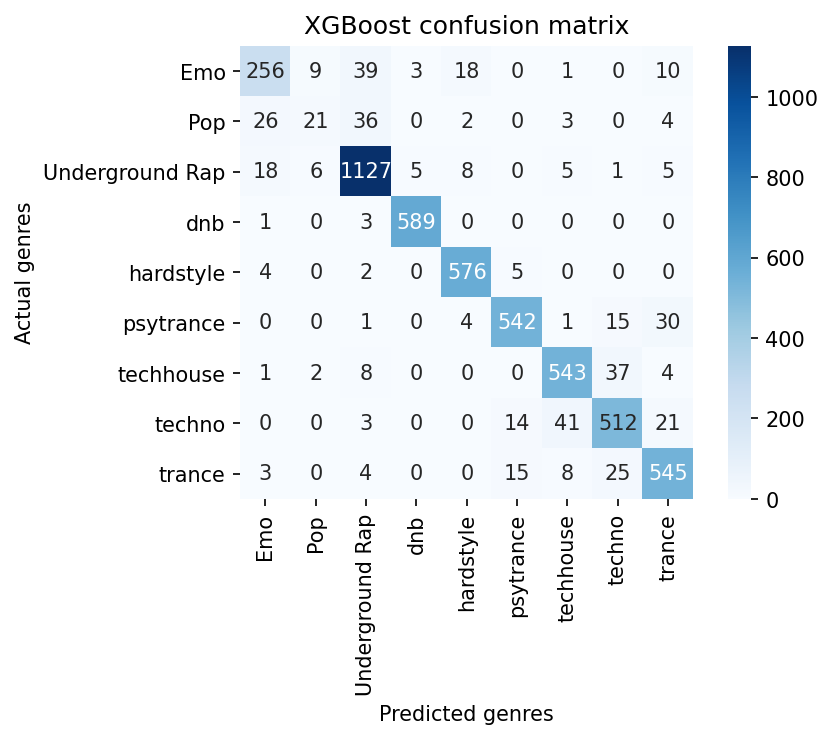

In [9]:
knn_confusion = confusion_matrix(y_val_xgb, gbm.predict(X_val, ntree_limit=gbm.best_ntree_limit))
plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels= ['Emo', 'Pop', 'Underground Rap', 'dnb', 'hardstyle', 'psytrance',
       'techhouse', 'techno', 'trance'],
           yticklabels= ['Emo', 'Pop', 'Underground Rap', 'dnb', 'hardstyle', 'psytrance',
       'techhouse', 'techno', 'trance']);
plt.xlabel('Predicted genres')
plt.ylabel('Actual genres')
plt.title('XGBoost confusion matrix');

### Test Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=21, shuffle=True)

In [11]:
y_train_xgb = pd.DataFrame(data= y_train)
y_test_xgb = pd.DataFrame(data= y_test)

le = preprocessing.LabelEncoder()
le.fit(y_train_xgb.values.ravel())

y_train_xgb = le.transform(y_train_xgb)
y_test_xgb = le.transform(y_test_xgb)

C:\Users\andro\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [12]:
gbm = xgb.XGBRegressor(
                       n_estimators=30000,
                       max_depth=5,
                       objective="multi:softmax",
                       learning_rate=.1,
                       subsample=0.8,
                       min_child_weight=2,
                       colsample_bytree=.7,
                       n_jobs=-1,
                       num_class=9,
                       )
eval_set=[(X_train,y_train_xgb),(X_test,y_test_xgb)] 
fit_model = gbm.fit(
                    X_train, y_train_xgb,
                    eval_set=eval_set,
                    eval_metric='merror',
                    early_stopping_rounds=20,
                    verbose=True
                    )

[0]	validation_0-merror:0.16608	validation_1-merror:0.17668
[1]	validation_0-merror:0.13750	validation_1-merror:0.15149
[2]	validation_0-merror:0.12016	validation_1-merror:0.12902
[3]	validation_0-merror:0.11067	validation_1-merror:0.11333
[4]	validation_0-merror:0.10529	validation_1-merror:0.10694
[5]	validation_0-merror:0.10253	validation_1-merror:0.10461
[6]	validation_0-merror:0.10079	validation_1-merror:0.10442
[7]	validation_0-merror:0.09817	validation_1-merror:0.10132
[8]	validation_0-merror:0.09735	validation_1-merror:0.10035
[9]	validation_0-merror:0.09643	validation_1-merror:0.09899
[10]	validation_0-merror:0.09532	validation_1-merror:0.09822
[11]	validation_0-merror:0.09498	validation_1-merror:0.09802
[12]	validation_0-merror:0.09362	validation_1-merror:0.09977
[13]	validation_0-merror:0.09294	validation_1-merror:0.09725
[14]	validation_0-merror:0.09173	validation_1-merror:0.09609
[15]	validation_0-merror:0.09139	validation_1-merror:0.09686
[16]	validation_0-merror:0.09057	v

[134]	validation_0-merror:0.04252	validation_1-merror:0.07749
[135]	validation_0-merror:0.04243	validation_1-merror:0.07788
[136]	validation_0-merror:0.04209	validation_1-merror:0.07749
[137]	validation_0-merror:0.04165	validation_1-merror:0.07768
[138]	validation_0-merror:0.04141	validation_1-merror:0.07768
[139]	validation_0-merror:0.04102	validation_1-merror:0.07788
[140]	validation_0-merror:0.04097	validation_1-merror:0.07807
[141]	validation_0-merror:0.04034	validation_1-merror:0.07730
[142]	validation_0-merror:0.04030	validation_1-merror:0.07788
[143]	validation_0-merror:0.04020	validation_1-merror:0.07788
[144]	validation_0-merror:0.03976	validation_1-merror:0.07826
[145]	validation_0-merror:0.03986	validation_1-merror:0.07788
[146]	validation_0-merror:0.03952	validation_1-merror:0.07788
[147]	validation_0-merror:0.03889	validation_1-merror:0.07807
[148]	validation_0-merror:0.03875	validation_1-merror:0.07846
[149]	validation_0-merror:0.03802	validation_1-merror:0.07846
[150]	va

In [13]:
y_preds = gbm.predict(X_test)
accuracy = metrics.accuracy_score(y_test_xgb, y_preds)
precision = metrics.precision_score(y_test_xgb, y_preds, average='macro')
recall = metrics.recall_score(y_test_xgb, y_preds, average='macro')
f1 = metrics.f1_score(y_test_xgb, y_preds, average='macro')
print("Test Accuracy:" , round(accuracy, 3))
print("Test Precision:", round(precision, 3))
print("Test Recall:", round(recall, 3))
print("Test F1 Score:", round(f1, 3))

Test Accuracy: 0.923
Test Precision: 0.884
Test Recall: 0.846
Test F1 Score: 0.856


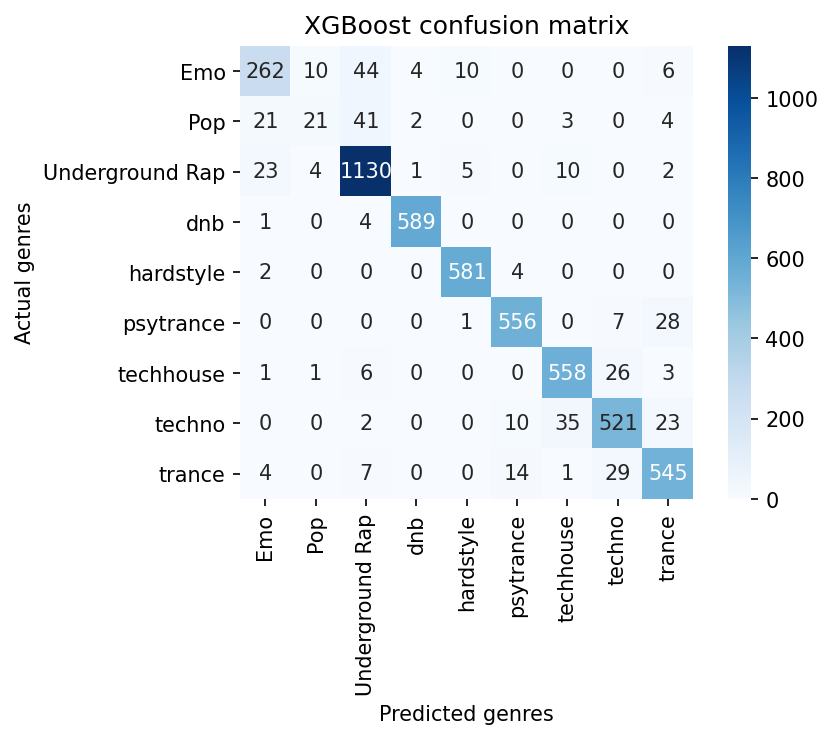

In [14]:
knn_confusion = confusion_matrix(y_test_xgb, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))
plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels= ['Emo', 'Pop', 'Underground Rap', 'dnb', 'hardstyle', 'psytrance',
       'techhouse', 'techno', 'trance'],
           yticklabels= ['Emo', 'Pop', 'Underground Rap', 'dnb', 'hardstyle', 'psytrance',
       'techhouse', 'techno', 'trance']);
plt.xlabel('Predicted genres')
plt.ylabel('Actual genres')
plt.title('XGBoost confusion matrix');

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

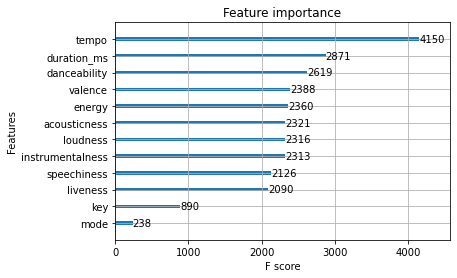

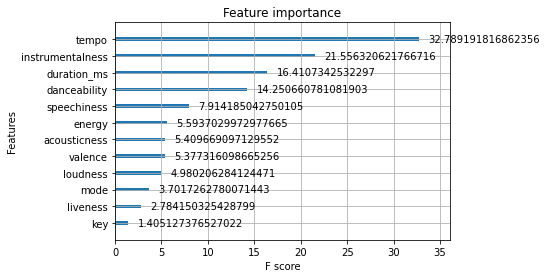

In [15]:
xgb.plot_importance(gbm)
xgb.plot_importance(gbm, importance_type='gain')

## Random Over Sampler

In [16]:
import imblearn.over_sampling

emo = np.sum(y_train_xgb == 0)
pop = np.sum(y_train_xgb == 1)
und_rap = np.sum(y_train_xgb == 2)
dnb = np.sum(y_train_xgb == 3)
hardstyle = np.sum(y_train_xgb == 4)
psytrance = np.sum(y_train_xgb == 5)
techhouse = np.sum(y_train_xgb == 6)
techno = np.sum(y_train_xgb == 7)
trance = np.sum(y_train_xgb == 8)

ratio = {
        0: int((und_rap/emo)*emo), 1: int((und_rap/pop)*pop), 2: und_rap,
        3: int((und_rap/dnb)*dnb), 4: int((und_rap/hardstyle)*hardstyle),
        5: int((und_rap/psytrance)*psytrance), 6: int((und_rap/techhouse)*techhouse),
        7: int((und_rap/techno)*techno), 8: int((und_rap/trance)*trance)
        }

In [17]:
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state = 21)

X_tr_rs, y_tr_rs = ROS.fit_resample(X_train, y_train_xgb)

In [18]:
gbm = xgb.XGBRegressor(
                       n_estimators=30000,
                       max_depth=5,
                       objective="multi:softmax",
                       learning_rate=.1,
                       subsample=0.8,
                       min_child_weight=3,
                       colsample_bytree=.7,
                       n_jobs=-1,
                       num_class=9,
                       )
eval_set=[(X_tr_rs,y_tr_rs),(X_test,y_test_xgb)] 
fit_model = gbm.fit(
                    X_tr_rs, y_tr_rs,
                    eval_set=eval_set,
                    eval_metric='merror',
                    early_stopping_rounds=20,
                    verbose=True
                    )

[0]	validation_0-merror:0.31137	validation_1-merror:0.31151
[1]	validation_0-merror:0.17730	validation_1-merror:0.17203
[2]	validation_0-merror:0.14615	validation_1-merror:0.14006
[3]	validation_0-merror:0.14246	validation_1-merror:0.13948
[4]	validation_0-merror:0.13787	validation_1-merror:0.13638
[5]	validation_0-merror:0.13102	validation_1-merror:0.13038
[6]	validation_0-merror:0.12891	validation_1-merror:0.12631
[7]	validation_0-merror:0.12546	validation_1-merror:0.12437
[8]	validation_0-merror:0.12326	validation_1-merror:0.12243
[9]	validation_0-merror:0.12114	validation_1-merror:0.11914
[10]	validation_0-merror:0.12028	validation_1-merror:0.11972
[11]	validation_0-merror:0.11915	validation_1-merror:0.11740
[12]	validation_0-merror:0.11856	validation_1-merror:0.11546
[13]	validation_0-merror:0.11608	validation_1-merror:0.11740
[14]	validation_0-merror:0.11468	validation_1-merror:0.11449
[15]	validation_0-merror:0.11407	validation_1-merror:0.11352
[16]	validation_0-merror:0.11258	v

[134]	validation_0-merror:0.04085	validation_1-merror:0.09027
[135]	validation_0-merror:0.04050	validation_1-merror:0.08989
[136]	validation_0-merror:0.04026	validation_1-merror:0.09008
[137]	validation_0-merror:0.03960	validation_1-merror:0.08969
[138]	validation_0-merror:0.03917	validation_1-merror:0.09047
[139]	validation_0-merror:0.03901	validation_1-merror:0.09027
[140]	validation_0-merror:0.03870	validation_1-merror:0.09008
[141]	validation_0-merror:0.03837	validation_1-merror:0.09047
[142]	validation_0-merror:0.03764	validation_1-merror:0.09008
[143]	validation_0-merror:0.03726	validation_1-merror:0.08969
[144]	validation_0-merror:0.03712	validation_1-merror:0.08989
[145]	validation_0-merror:0.03728	validation_1-merror:0.08931
[146]	validation_0-merror:0.03653	validation_1-merror:0.08853
[147]	validation_0-merror:0.03622	validation_1-merror:0.08795
[148]	validation_0-merror:0.03601	validation_1-merror:0.08814
[149]	validation_0-merror:0.03589	validation_1-merror:0.08756
[150]	va

In [19]:
y_preds = gbm.predict(X_test)
accuracy = metrics.accuracy_score(y_test_xgb, y_preds)
precision = metrics.precision_score(y_test_xgb, y_preds, average='macro')
recall = metrics.recall_score(y_test_xgb, y_preds, average='macro')
f1 = metrics.f1_score(y_test_xgb, y_preds, average='macro')
print("Test Accuracy:" , round(accuracy, 3))
print("Test Precision:", round(precision, 3))
print("Test Recall:", round(recall, 3))
print("Test F1 Score:", round(f1, 3))

Val Accuracy: 0.919
Val Precision: 0.858
Val Recall: 0.86
Val F1 Score: 0.859


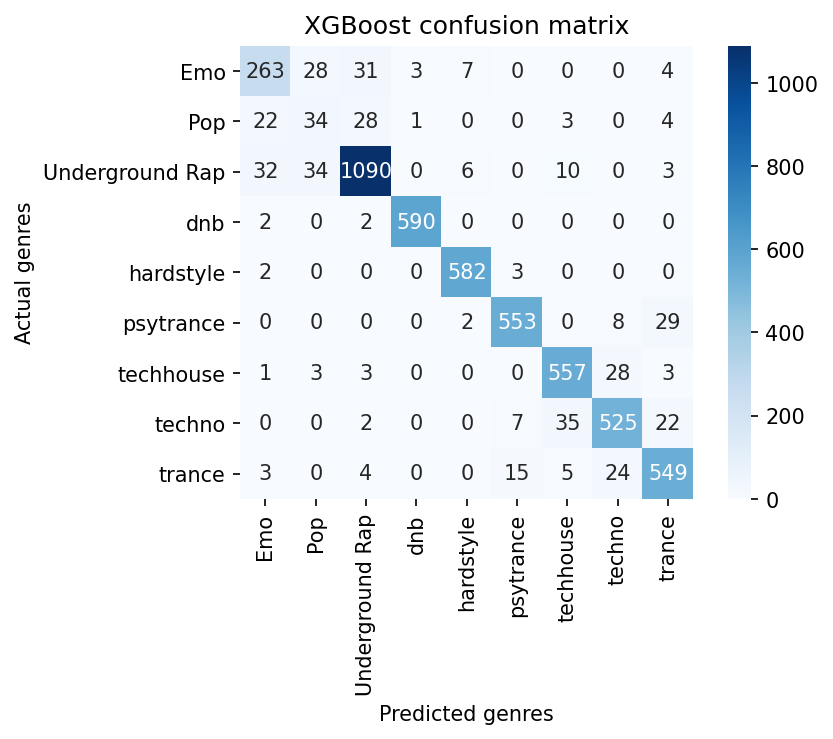

In [20]:
knn_confusion = confusion_matrix(y_test_xgb, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))
plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels= ['Emo', 'Pop', 'Underground Rap', 'dnb', 'hardstyle', 'psytrance',
       'techhouse', 'techno', 'trance'],
           yticklabels= ['Emo', 'Pop', 'Underground Rap', 'dnb', 'hardstyle', 'psytrance',
       'techhouse', 'techno', 'trance']);
plt.xlabel('Predicted genres')
plt.ylabel('Actual genres')
plt.title('XGBoost confusion matrix');